# Predictive Analytics for Supermarket Sales: Data Exploration, Model Selection, and Evalutaion

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warnings

# Loading Dataset

In [2]:
try:
    sales_data = pd.read_csv('supermarket_sales.csv')
except FileNotFoundError:
    print("The file 'supermarket_sales.csv' was not found.")
    raise

# Data Exploration


Exploring the data to understand it better and check for any anomalies or missing values. I will also identify variables relationships with 'Total'

In [3]:
#Display the first few rows of the dataset
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Display information about the dataset
sales_data.info()

#Display summary statistics
sales_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
#Displaying the number of missing values in each column
missing_values = sales_data.isnull().sum()

print(missing_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [6]:
#Drop duplicates rows
sales_data = sales_data.drop_duplicates()

# Removing Outliers

In [7]:
# Selecting numerical columns for outlier detection
numerical_columns = sales_data.select_dtypes(include=np.number).columns

# Defining a function to handle outliers using IQR and return a cleaned DataFrame
def remove_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    cleaned_data = data[~outliers]
    return cleaned_data

# Removing outliers for each numerical column
for column in numerical_columns:
    sales_data = remove_outliers_iqr(sales_data, column)

# Displaying summary statistics after removing outliers
print(sales_data.describe())

       Unit price    Quantity      Tax 5%       Total        cogs  \
count  991.000000  991.000000  991.000000  991.000000  991.000000   
mean    55.292482    5.469223   15.076417  316.604752  301.528335   
std     26.311619    2.905031   11.319504  237.709589  226.390085   
min     10.080000    1.000000    0.508500   10.678500   10.170000   
25%     32.665000    3.000000    5.817500  122.167500  116.350000   
50%     54.840000    5.000000   12.036000  252.756000  240.720000   
75%     77.485000    8.000000   22.127000  464.667000  442.540000   
max     99.960000   10.000000   45.325000  951.825000  906.500000   

       gross margin percentage  gross income      Rating  
count             9.910000e+02    991.000000  991.000000  
mean              4.761905e+00     15.076417    6.979717  
std               6.131525e-14     11.319504    1.716957  
min               4.761905e+00      0.508500    4.000000  
25%               4.761905e+00      5.817500    5.500000  
50%               4.7619

# Identifying the relationship and patterns between different features and the target variable ('Total')

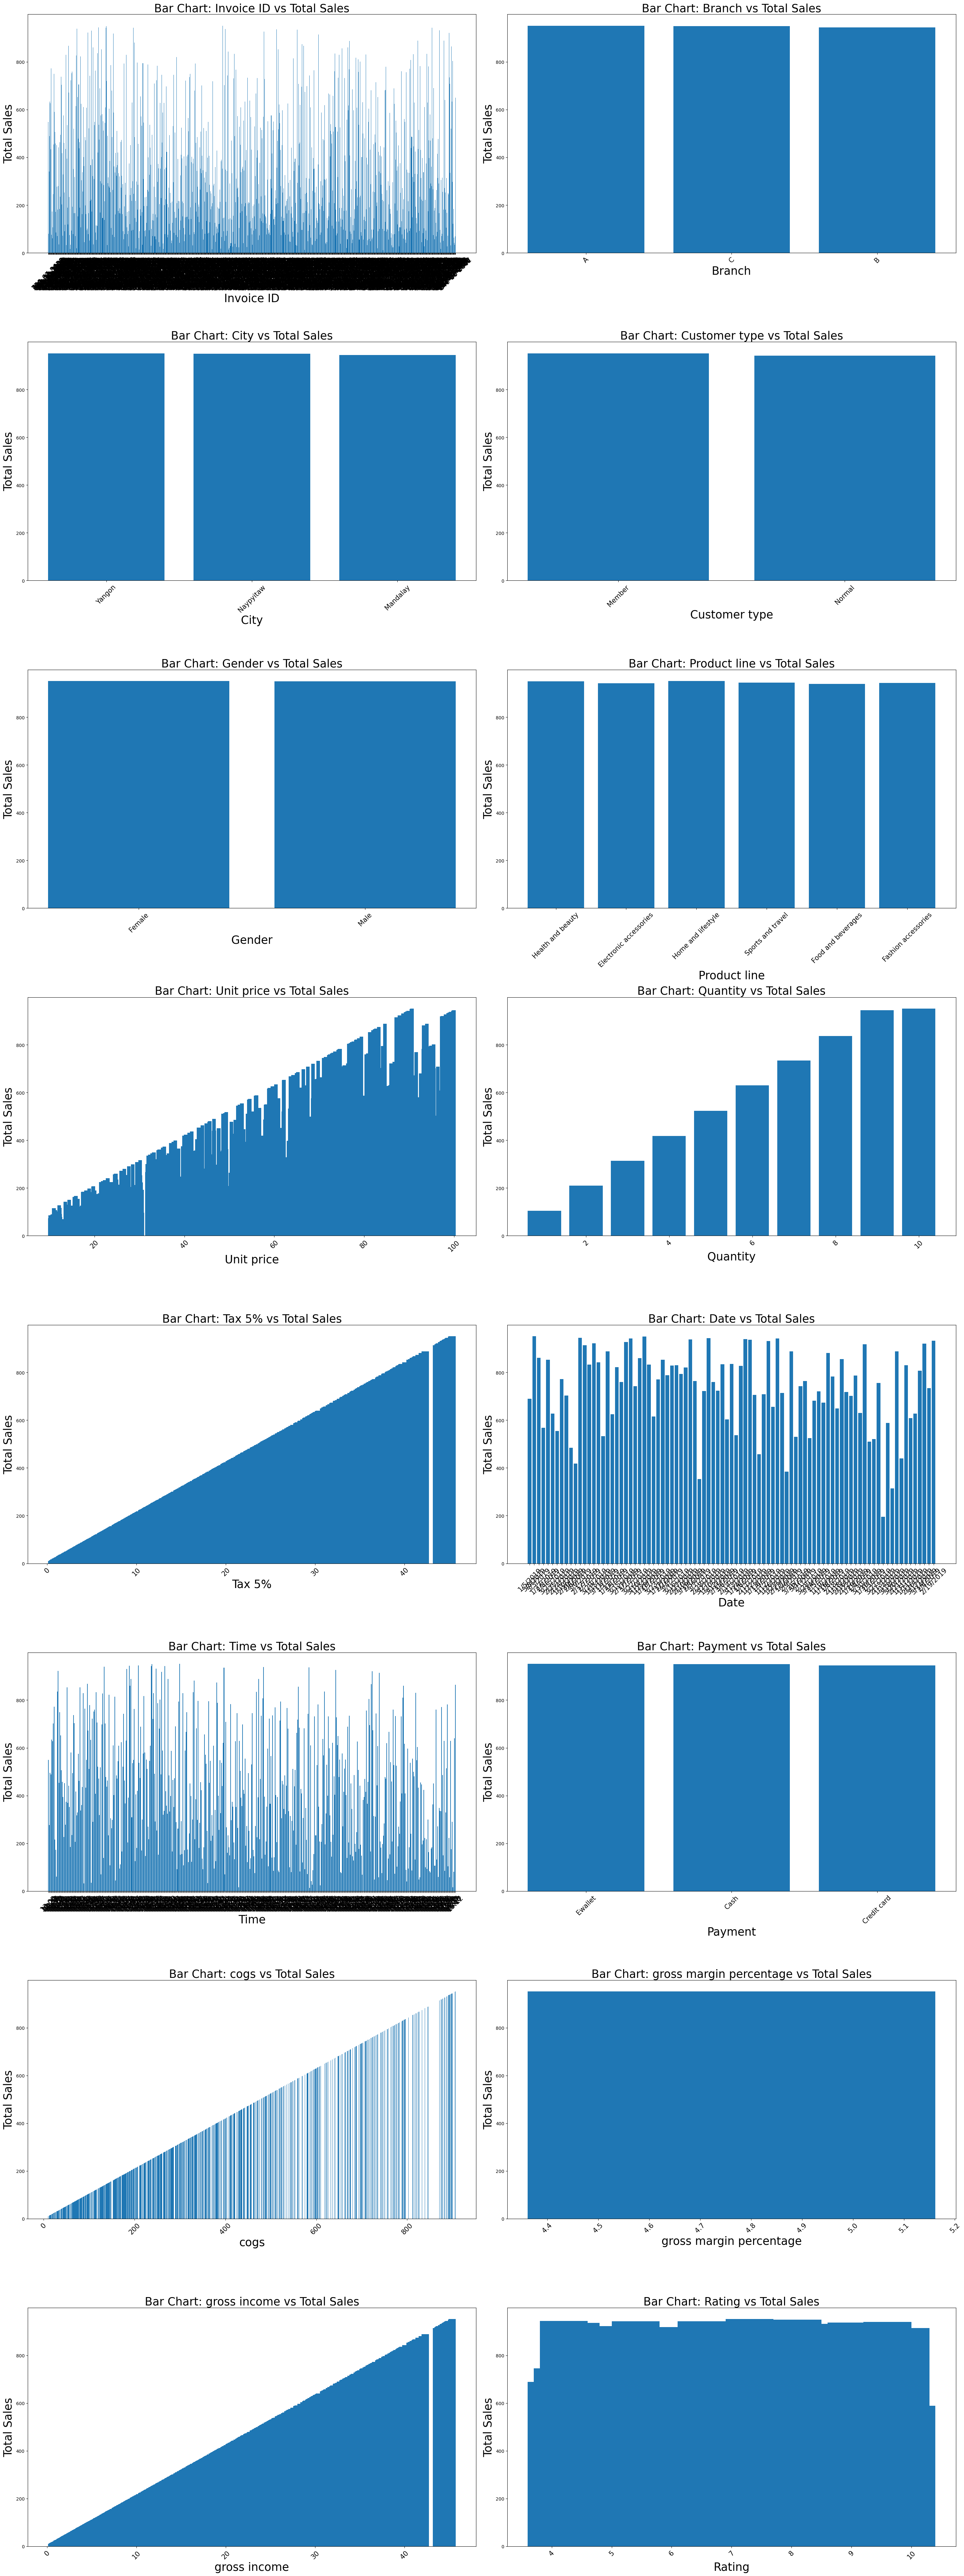

In [57]:
# Getting all columns except 'Total'
features = sales_data.columns.tolist()
features.remove('Total')

# Calculating the number of rows and columns for subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(features) - 1) // num_cols + 1  # Number of rows needed

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 80))

# Plotting each variable against 'Total'
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols

    axes[row, col].bar(sales_data[feature], sales_data['Total'])
    axes[row, col].set_xlabel((feature), fontsize = 25)
    axes[row, col].set_ylabel('Total Sales', fontsize=25)
    axes[row, col].set_title((f'Bar Chart: {feature} vs Total Sales'), fontsize=25)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=15)  # Rotate x-axis labels


# Adjusting layout and spacing
plt.tight_layout()

# Show the plots
plt.show()

# Feature Selection

In [58]:
#Selecting relevant features (independent variables)
target_variable = 'Total'
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line',
            'Unit price', 'Quantity','Tax 5%', 'Payment', 'cogs', 'gross margin percentage', 'gross income']

# The selected features will now be my new dataset.


In [59]:
# A new dataframe with only the selected features and the target variable
selected_sales_data = sales_data[features + [target_variable]]


In [60]:
# Converting categorical variables to numerical using one-hot encoding
selected_sales_data = pd.get_dummies(selected_sales_data)

In [61]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_sales_data.drop(target_variable, axis=1),
                                                    selected_sales_data[target_variable],
                                                    test_size=0.2,
                                                    random_state=42)


# Model Selection

Selecting my model: Random Forests(model1), Neural Network(model2), and Linear Regression(model3)

In [62]:
# Define models
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLPRegressor": MLPRegressor(random_state=42, max_iter=500), # just in case, i will increase the max_iter to 500 to handle any convergence warning
    "LinearRegression": LinearRegression()
}


# Standardizing Features

In [63]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Train, Evaluate, and Visualize Models

RandomForestRegressor Evaluation:
Mean Absolute Error (MAE): 0.7944168090452193
Mean Squared Error (MSE): 3.3236542063460033
R-squared (R2): 0.9999484283103733


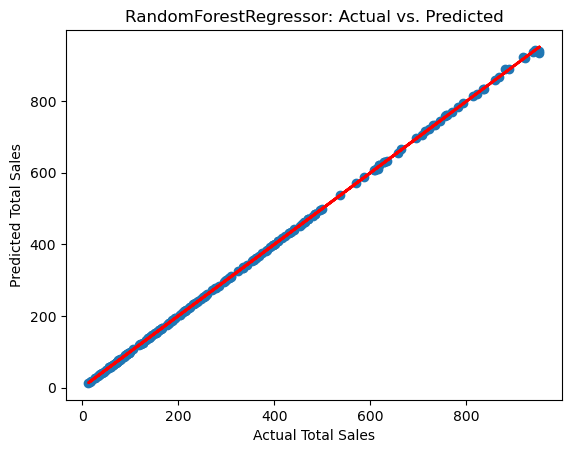

MLPRegressor Evaluation:
Mean Absolute Error (MAE): 22.89302709215442
Mean Squared Error (MSE): 753.008068680598
R-squared (R2): 0.9883159029208719


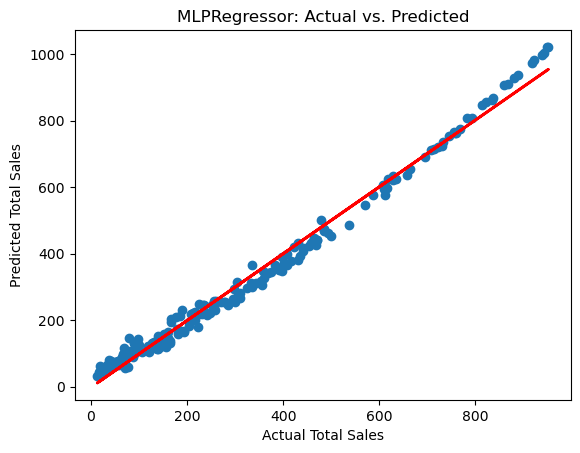

LinearRegression Evaluation:
Mean Absolute Error (MAE): 6.909938841104191e-14
Mean Squared Error (MSE): 7.628705150753281e-27
R-squared (R2): 1.0


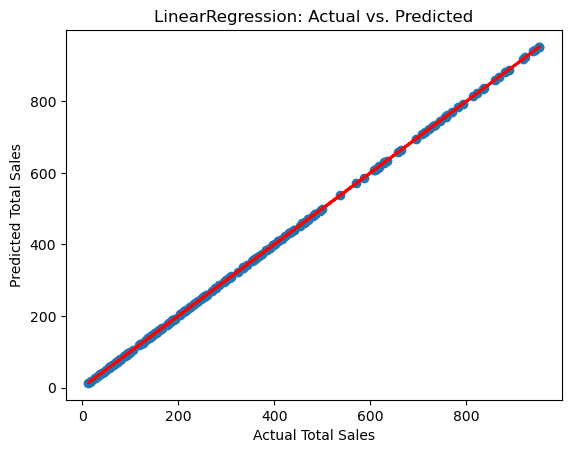

In [64]:
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)

    # Making Predictions with the model
    predictions = model.predict(X_test_scaled)

    # Evaluating the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f'{model_name} Evaluation:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R2): {r2}')

    # Visualization: Scatter plot for model predictions
    plt.scatter(y_test, predictions)
    plt.xlabel("Actual Total Sales")
    plt.ylabel("Predicted Total Sales")
    plt.title(f"{model_name}: Actual vs. Predicted")
    # Calculate the best-fit line
    fit_line = np.polyfit(y_test, predictions, 1)
    best_fit = np.poly1d(fit_line)
    plt.plot(y_test, best_fit(y_test), color='red', linewidth=2)

    plt.show()